# Simulation and introduction to statistics

#### *07 Octorber 2019*
#### *DATA 1010*

## Simulation

In this section, we will learn techniques for sampling from probability distributions. This is a useful skill because it allows us to flexibly generate data for which we know the underlying probability distribution. These data can be used to test machine learning methods and see how well they perform in ideal circumstances. We can adjust the number of observations, the shape of the distribution, etc., and see how these changes affect the results.

Perhaps the most important simulation technique is the **inverse CDF trick**. It gives us a way to simulate from any probability distribution on the number line whose cumulative distribution function we can compute with.

Given a cumulative distribution function $F$, let us define the **generalized inverse** $F^{-1}: [0,1] \to [-\infty,\infty]$ so that $F^{-1}(u)$ is the left endpoint of the interval of points which are mapped by $F$ to a value which is greater than or equal to $u$.

The generalized inverse is like the inverse function of $F$, except that if the graph of $F$ has a vertical jump somewhere, then all of the $y$ values spanned by the jump get mapped by $F^{-1}$ to the $x$-value of the jump, and if the graph of $F$ is flat over a stretch of $x$-values, then the corresponding $y$-value gets mapped by $F^{-1}$ back to the left endpoint of the interval of $x$ values.

The inverse CDF trick says that if $U$ is uniformly distributed on $[0,1]$, then the cumulative distribution of $X = F^{-1}(U)$ is $F$.

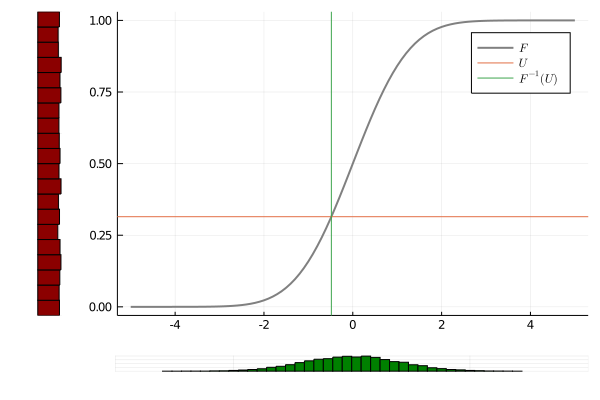

In [1]:
using Plots, Distributions, LaTeXStrings
F(x) = cdf(Normal(0,1), x)
mainplot = plot(-5:0.1:5, F, label = L"F", color = "gray", linewidth = 2.0)
U = rand()
hline!([U], label = L"U")
vline!([invlogcdf(Normal(0,1), log(U))], label = L"F^{-1}(U)")
lefthist = histogram([rand() for i in 1:10_000], label = "", orientation = :h, 
                      axis = false, ylims = (0,1), color = :DarkRed)
bottomhist = histogram([invlogcdf(Normal(0,
                1), log(rand())) for _ in 1:10_000], 
                       axis = false, xlims = (-5,5), label = "", color = :green)
layout = @layout [lefthist  mainplot{0.95w,0.95h}
                     _      bottomhist]
emptyplot = plot()

plot(lefthist, mainplot, bottomhist, emptyplot, layout=layout)

## Problem 1
Apply the inverse CDF trick to simulate a random variable whose density function is $f(x) = 2x$ on the interval $[0,1]$. Plot a histogram of many values returned by this function, and show that the histogram has the same approximate shape as the graph of $f$.

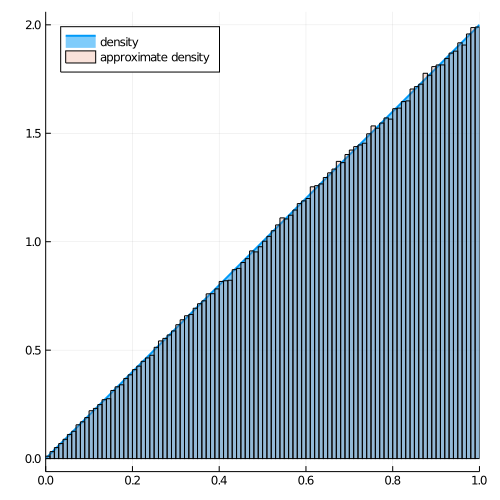

In [2]:
# solution
F⁻¹(x) = √(x)
plot(0:1, x-> 2x, linewidth = 2, label = "density", fillrange = 0, fillopacity = 0.5, ratio = 0.5, size = (500,500), xlims = (0,1))
histogram!([F⁻¹(rand()) for _ in 1:1_000_000], normed = true,
            label = "approximate density", legend = :topleft, nbins = 100, fillalpha = 0.2)

## Problem 2

Use the inverse CDF idea to draw from the distribution on $[0,1]^2$ whose density function is $f(x,y) = \frac32(x^2 + y^2)$.

Hint: first draw $X$ from its distribution, then draw $Y$ from its conditional distribution given the sampled value of $X$.

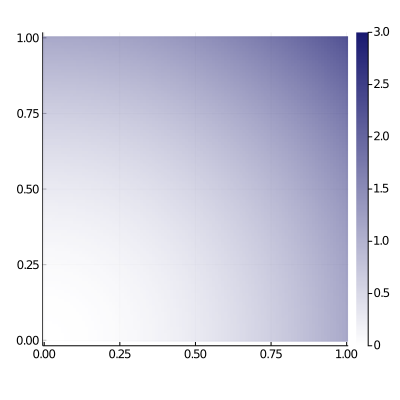

In [3]:
heatmap(0:0.01:1, 0:0.01:1, (x,y) -> 3(x^2 + y^2)/2, ratio = 1, size = (400,400), fillopacity = 0.75, fillcolor = cgrad([:white, :MidnightBlue]))

In [4]:
# solution
using SymPy
@vars x y u
f_X = integrate(3(x^2+y^2)/2, (y, 0, 1)) # find density of X
F_X = lambdify(integrate(f_X, (x, 0, x))) # find CDF by integrating density
solve(F_X(x) - y, x)

3-element Array{Sym,1}:
 -1.0*(-0.5 - 0.866025403784439*I)*(-y + (y^2 + 0.037037037037037)^0.5)^(1/3) + 0.333333333333333*(-0.5 + 0.866025403784439*I)/(-y + (y^2 + 0.037037037037037)^0.5)^(1/3)
 -1.0*(-0.5 + 0.866025403784439*I)*(-y + (y^2 + 0.037037037037037)^0.5)^(1/3) + 0.333333333333333*(-0.5 - 0.866025403784439*I)/(-y + (y^2 + 0.037037037037037)^0.5)^(1/3)
                                                           -1.0*(-y + (y^2 + 0.037037037037037)^0.5)^(1/3) + 0.333333333333333/(-y + (y^2 + 0.037037037037037)^0.5)^(1/3)

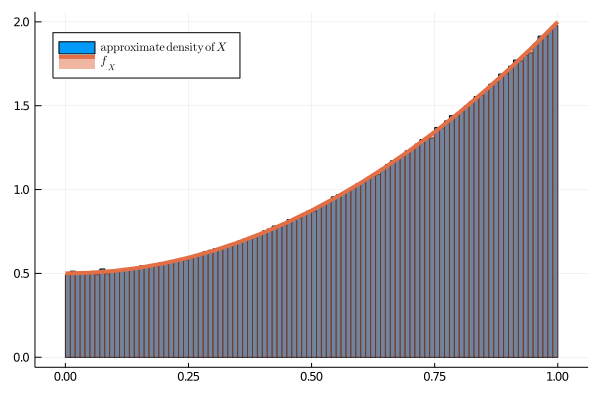

In [6]:
# solution
F_X⁻¹ = lambdify(solve(F_X(x) - y, x)[3]) # the third root is the real one
histogram([F_X⁻¹(rand()) for _ in 1:1_000_000], label = L"\mathrm{approximate \, density \, of \, } X", 
          legend = :topleft, normed = true)
plot!(0:0.05:1, lambdify(f_X), label = L"f_X", linewidth = 4, fillrange = 0, fillopacity = 0.5)

In [7]:
# solution
f_Y_given_X = 3(x^2+y^2)/2 / integrate(3(x^2+y^2)/2, (y, 0, 1))
F_Y = lambdify(integrate(f_Y_given_X, (y, 0, y)))

#87 (generic function with 1 method)

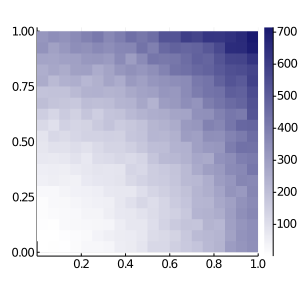

In [8]:
# solution
using Roots
F_Y_given_X⁻¹(x,u) = find_zero(y -> F_Y(x,y) - u, 1/2)
function sampleXY()
    X = F_X⁻¹(rand())
    Y = F_Y_given_X⁻¹(X, rand())
    (X,Y)
end
histogram2d([sampleXY() for _ in 1:100_000], ratio = 1, size = (300,300), color = cgrad([:white, :MidnightBlue]))

## Problem 3

Write a function which starts with `U = rand()` and uses `U` to return a random integer which is 1 with probability 3/5,  2 with probability 1/5, and 3 with probability 1/5. 

In [13]:
# solution
using StatsBase
function rand123()
    U = rand()
    if U < 0.6
        1
    elseif U < 0.8
        2
    else
        3
    end
end
countmap([rand123() for _ in 1:100_000])

Dict{Int64,Int64} with 3 entries:
  2 => 19967
  3 => 20080
  1 => 59953

# Problem 4

Write a function which draws from the multivariate Gaussian distribution with mean
$\boldsymbol{\mu} = [1/2, 1/2]$ and covariance matrix $\Sigma = \begin{bmatrix} 2 && 0.5 \\ 0.5 && 1 \end{bmatrix}$.

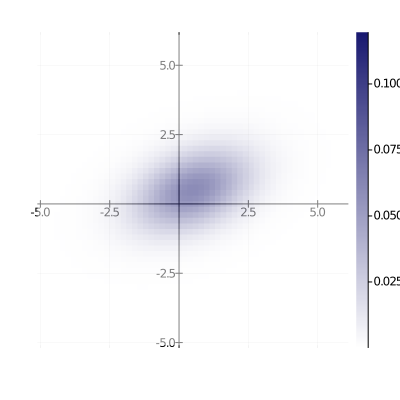

In [14]:
μ = [1/2, 1/2]
Σ = [2 0.5; 0.5 1]
𝒩 = MvNormal(μ, Σ)
heatmap(-5:0.2:6, -5:0.2:6, (x,y) -> pdf(𝒩, [x, y]), ratio = 1, 
        size = (400,400), frame = :origin, fillalpha = 0.5, color = cgrad([:white, :MidnightBlue]))

# solution
The covariance of $AZ + \mathbf{\mu}$ is $\mathbb{E}[(AZ)(AZ)'] = A \mathbb{E}[ZZ'] A' = A I A' = AA'$. Therefore, we want to find a matrix $A$ such that $AA' = \Sigma$. One simple way to do this is to let $A$ be the square root of $\Sigma$, since the square root of a symmetric matrix is symmetric. 

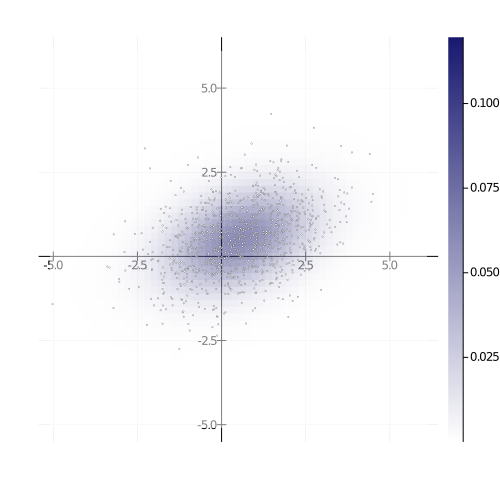

In [15]:
# solution
A = sqrt([2 0.5; 0.5 1])
function randvector()
    A*randn(2) + μ
end
scatter!([Tuple(randvector()) for _ in 1:1000], color = :white, markersize = 1, markerstrokewidth = 0.2, label = "", size = (500,500))

---

## Introduction to statistics

The central problem of statistics is to make inferences about a population or data-generating process based on the information in a finite sample drawn from the population.

**Parametric estimation** involves an assumption that distribution of the data-generating process comes from a family of distributions parameterized by finitely many real numbers, while **nonparametric estimation** does not.

## Problem 4

(a) Give an example each of parametric and non-parametric estimation methods.  
(b) Does histogram estimation involve parameters? 

# solution
(a) Histogram estimation is nonparametric: when we make a histogram from a list of real numbers, we do not assume those data come from any particular family of distributions. 

Esimating a density as a Gaussian *is* parametric, since we are assuming the data are sampled from a distribution which belongs to a particular parametric family (namely, the family of Gaussians). 

(b) Yes, histogram estimation does involve parameters (like the number of bins to use). *Nonparametric* does not mean *parameter-free*. 

## Problem 5

Run the cell below to pull in a function called `mysteryRV` (don't look at the source code!). Run the function several times to try to draw some conclusions about its distribution.

In [18]:
include("mystery-distribution.jl")

mysteryRV (generic function with 1 method)

In [19]:
xs = [mysteryRV() for _ in 1:100_000]

100000-element Array{Real,1}:
  2.9162166869018233
 -1
 -1
 -1
  1.6556651171955103
 -0.5
  2.797894603728941
 -0.5
 -1
 -0.5
  2.8429262791399443
 -1
  1.9966020014443377
  ⋮
 -1
 -0.5
  1.6613498486890665
  1.581415843980231
  2.0364746367297917
 -1
  1.5904268317895076
 -1
 -0.5
  2.7784683516619184
  1.9555288065954823
 -1

# solution
We can see that the function returns the values $-1$ and $-0.5$ with a positive probability. All the other values returned are unique:

In [20]:
# solution
[(a,b) for (a,b) in countmap(xs) if b > 1]

2-element Array{Tuple{Real,Int64},1}:
 (-1, 39758)
 (-0.5, 20085)

# solution
We see that $-1$ is returned about 40% of the time, and $-0.5$ about 20%. To understand the distribution of the other values, we plot a histogram:

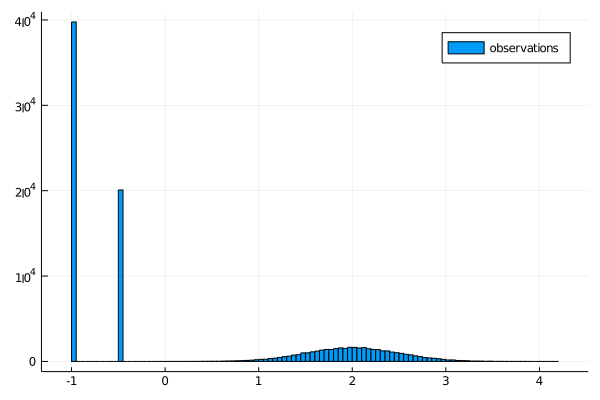

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [22]:
histogram(xs, label = "observations", bins = 100)

# solution
The values other than $-1$ and $-0.5$ appear to be normally distributed. Let's take a look: 

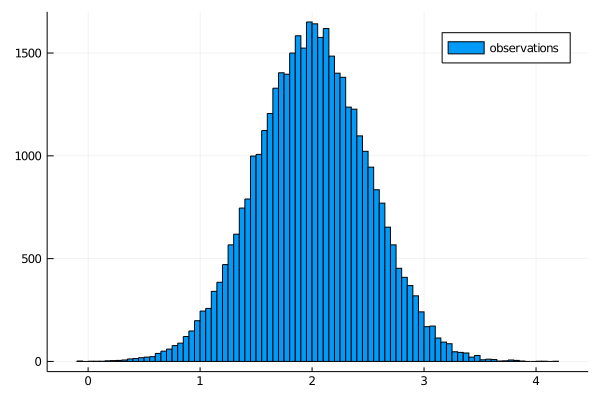

In [23]:
# solution
xs2 = [x for x in xs if x ∉ [-1,-0.5]]
histogram(xs2, label = "observations", bins = 100)

# solution
We estimate the mean and standard deviation of those values:

In [24]:
# solution
[f(xs2) for f in (mean,var)]

2-element Array{Float64,1}:
 2.0015021576283107
 0.24843042958827372

# solution
So all together, it looks like the distribution of $X$ puts 60% of its probability mass at $-1$, 20% at $-0.5$, and the other 20% spread out according to the normal distribution with mean 2 and variance 1/4.